# Automating the stuff...

In [1]:
def score(dataframe):
    columns = dataframe.shape[1]
    rows = dataframe.shape[0]
    if rows < 300:
            print("Too few data for prediction")
            score0=0
    elif rows >100000:
            print("Too huge data to handle. Overflow......")
    elif rows >= 300 and rows<1000:
            score0=2
    elif rows >= 1000 and rows<5000:
            score0=4
    elif rows >= 5000 and rows<10000:
            score0=6
    elif rows >= 20000 and rows<50000:
            score0=8
    elif rows >50000:
            score0=10
    
    
    null_val = dataframe.isnull().sum().sum()
    total_val = columns*rows
    null_perc = (null_val*100)/total_val
    if null_perc >=50:
        score1=0
    elif null_perc <50 and null_perc >=40:
                score1=2
    elif null_perc <40 and null_perc>=30:
                score1=4
    elif null_perc <30 and null_perc>=20:
                score1=6   
    elif null_perc <20 and null_perc>=10:
                score1=8   
    elif null_perc <10:
                score1=10 
    temp=0
    for i in dataframe.dtypes:
                if i=='int64':
                    temp=temp+1
    int_perc = (temp*100)/columns
    if int_perc <=50:
                score2=0
    elif int_perc >50 and int_perc<=60:
                score2=2
    elif int_perc >60 and int_perc<=70:
                score2=4
    elif int_perc >70 and int_perc<=80:
                score2=6   
    elif int_perc >80 and int_perc<=90:
                score2=8   
    elif int_perc >90 and int_perc<=100:
                score2=10        
    print("Score is = "+str(score0+score1+score2)+" out of 30")    

# Data set-1

In [2]:
import pandas as pd

In [3]:
df1= pd.read_csv("heart_1.csv")

In [4]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df1.shape

(303, 14)

In [6]:
corr_matrix = df1.corr()
corr_matrix['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [7]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data set-2

In [10]:
df2=pd.read_csv("heart_2.csv")

In [11]:
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df2.shape

(299, 13)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [14]:
df2.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Data set-3

In [15]:
df3=pd.read_csv("heart_3.csv")

In [16]:
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
df3.shape

(1025, 14)

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
df3.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Data set - 4

In [20]:
df4 = pd.read_csv("heart_4.csv")

In [21]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df4.shape

(303, 14)

In [23]:
corr_matrix = df4.corr()
corr_matrix['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [25]:
df4.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Checking the validity of each data set

In [26]:
score(df1)

Score is = 22 out of 30


In [27]:
score(df2)

Too few data for prediction
Score is = 16 out of 30


In [28]:
score(df3)

Score is = 24 out of 30


In [29]:
score(df4)

Score is = 22 out of 30


In [30]:
data = pd.read_csv("heart_3.csv")

## Finding correlations

In [31]:
corr_matrix = data.corr()
corr_matrix['target'].sort_values(ascending = False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'restecg'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'thal'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'trestbps'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

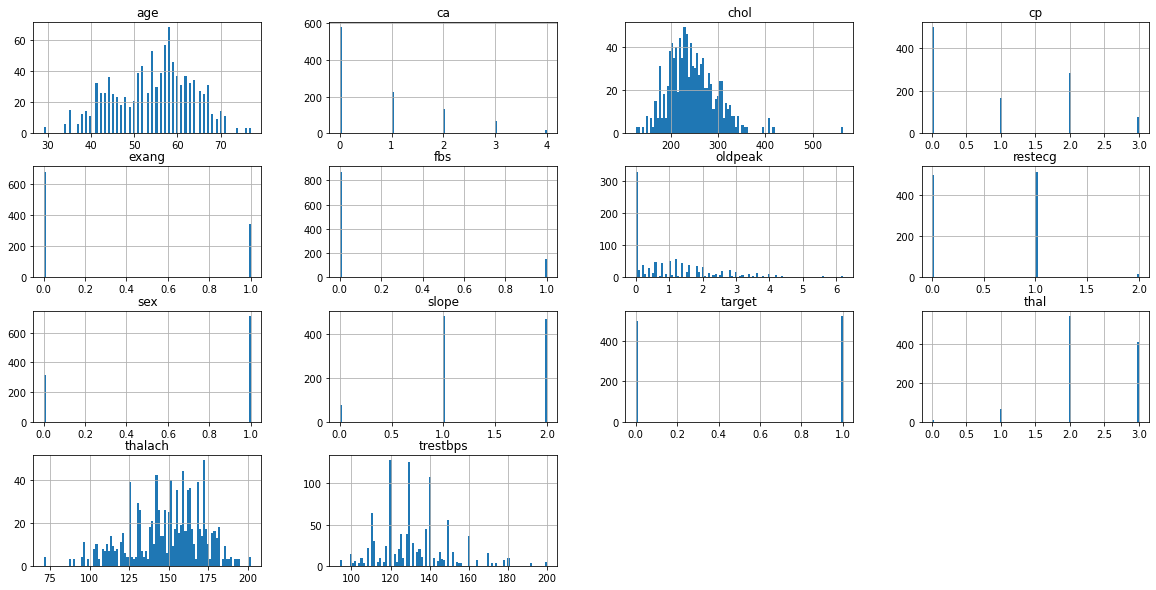

In [33]:
data.hist(bins = 100,figsize = (20,10))

## Dropping the features with least correlation


In [34]:
data.drop(["restecg","fbs","chol","trestbps","sex","thal"], axis = 1,inplace = True) 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1025 non-null   int64  
 1   cp       1025 non-null   int64  
 2   thalach  1025 non-null   int64  
 3   exang    1025 non-null   int64  
 4   oldpeak  1025 non-null   float64
 5   slope    1025 non-null   int64  
 6   ca       1025 non-null   int64  
 7   target   1025 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 64.1 KB


In [36]:
data.head()

,age,cp,thalach,exang,oldpeak,slope,ca,target
0,52,0,168,0,1.0,2,2,0
1,53,0,155,1,3.1,0,0,0
2,70,0,125,1,2.6,0,0,0
3,61,0,161,0,0.0,2,1,0
4,62,0,106,0,1.9,1,3,0


## Splitting dataset into training and testing set

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(data, data['exang']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [38]:
strat_test_set['exang'].value_counts()

0    136
1     69
Name: exang, dtype: int64

In [39]:
strat_train_set['exang'].value_counts()

0    544
1    276
Name: exang, dtype: int64

In [40]:
data['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(data, data['slope']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [42]:
strat_train_set['slope'].value_counts()

1    386
2    375
0     59
Name: slope, dtype: int64

In [43]:
strat_test_set['slope'].value_counts()

1    96
2    94
0    15
Name: slope, dtype: int64

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(data, data['cp']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [45]:
strat_train_set['cp'].value_counts()

0    398
2    227
1    133
3     62
Name: cp, dtype: int64

In [46]:
strat_test_set['cp'].value_counts()

0    99
2    57
1    34
3    15
Name: cp, dtype: int64

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(data, data['ca']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [48]:
strat_train_set['ca'].value_counts()

0    462
1    181
2    107
3     55
4     15
Name: ca, dtype: int64

In [49]:
strat_test_set['ca'].value_counts()

0    116
1     45
2     27
3     14
4      3
Name: ca, dtype: int64

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(data, data['target']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [51]:
strat_train_set['target'].value_counts()

1    421
0    399
Name: target, dtype: int64

In [52]:
strat_test_set['target'].value_counts()

1    105
0    100
Name: target, dtype: int64

In [53]:
train_set = strat_train_set.copy()
test_set  = strat_test_set.copy()

# Now hereonwards only train set will be taken in consideration 

## Finding correlations in our training set

In [54]:
train_set.shape

(820, 8)

In [55]:
corr_matrix = train_set.corr()

In [56]:
corr_matrix['target'].sort_values(ascending = False)

target     1.000000
cp         0.450837
thalach    0.425847
slope      0.339492
age       -0.246086
ca        -0.383811
oldpeak   -0.427735
exang     -0.464727
Name: target, dtype: float64

In [57]:
%matplotlib inline

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'thalach'}>, <AxesSubplot:>]],
      dtype=object)

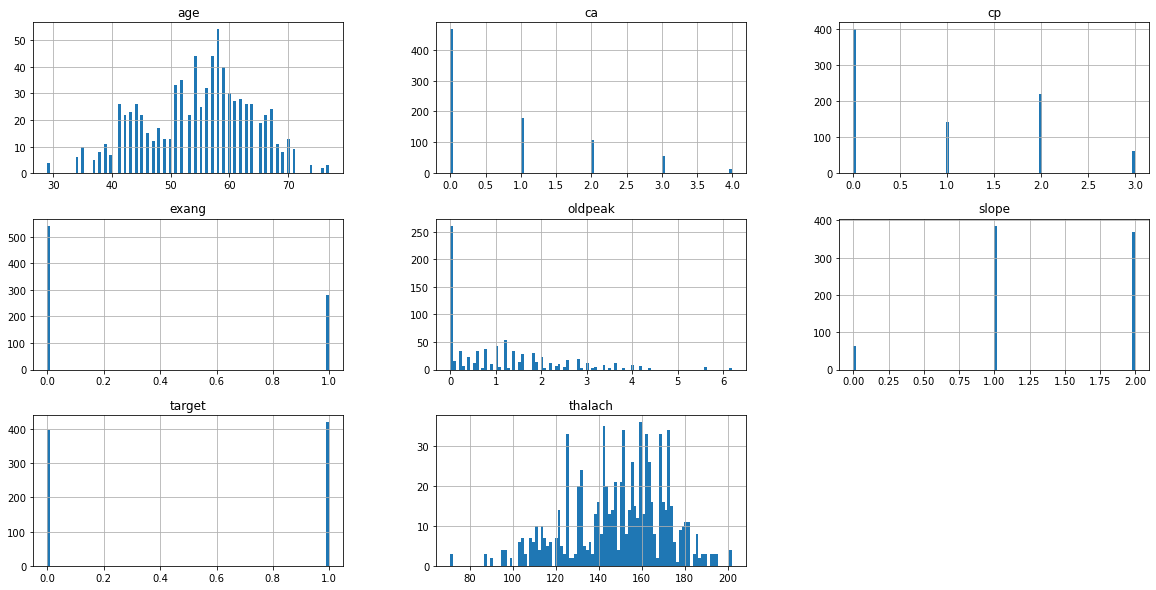

In [59]:
train_set.hist(bins = 100,figsize = (20,10))

In [60]:
train_set.head()

,age,cp,thalach,exang,oldpeak,slope,ca,target
4,62,0,106,0,1.9,1,3,0
688,56,0,133,1,4.0,0,2,0
477,57,2,150,0,0.4,1,1,0
336,57,2,173,0,0.2,2,1,1
960,52,2,169,0,0.1,1,0,1


In [61]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 4 to 489
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      820 non-null    int64  
 1   cp       820 non-null    int64  
 2   thalach  820 non-null    int64  
 3   exang    820 non-null    int64  
 4   oldpeak  820 non-null    float64
 5   slope    820 non-null    int64  
 6   ca       820 non-null    int64  
 7   target   820 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 57.7 KB


# Creating pipeline for bringing data in a standard scale as well as to deal with null values if found


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import  numpy as np
def pass_through_pipe(dataframe):
    pipe_mean= Pipeline([('imputer' , SimpleImputer(strategy='mean')) , ('std_scaler' , StandardScaler())])
    pipe_mode= Pipeline([('imputer' , SimpleImputer(strategy='most_frequent')) , ('std_scaler' , StandardScaler())])
#     now storing the pipline raw data into numpy array
    numpy_value_mean = pipe_mean.fit_transform(dataframe[['age' , 'thalach' , 'oldpeak']])
    numpy_value_mode = pipe_mode.fit_transform(dataframe[['cp' , 'exang' , 'slope' , 'ca']])
    result = np.concatenate((numpy_value_mean , numpy_value_mode) , axis=1)
    return result

##########################################################################################################################
# The features we will get will be numpy array with sequeance 
# 1)	Age
# 2)	Thalach
# 3)	Oldpeak
# 4)	Cp
# 5)	Exang
# 6)	Slope
# 7)	Ca

In [63]:
new_numpy_array = pass_through_pipe(train_set)

In [64]:
new_numpy_array

array([[ 0.81162633, -1.92115501,  0.69652503, ..., -0.71813066,
        -0.59754229,  2.20730061],
       [ 0.15224695, -0.72536159,  2.47581015, ...,  1.39250426,
        -2.1987994 ,  1.22840039],
       [ 0.26214351,  0.02754538, -0.57439291, ..., -0.71813066,
        -0.59754229,  0.24950018],
       ...,
       [ 0.81162633, -0.19389785,  4.33982313, ..., -0.71813066,
        -2.1987994 ,  2.20730061],
       [-0.17744274, -2.4083301 ,  0.78125289, ...,  1.39250426,
        -0.59754229,  1.22840039],
       [ 0.70172977, -0.54820701, -0.06602574, ...,  1.39250426,
        -0.59754229, -0.72940004]])

In [65]:
pass_through_pipe(train_set).shape

(820, 7)

In [66]:
target= train_set['target']

In [67]:
target

4      0
688    0
477    0
336    1
960    1
      ..
882    0
367    0
393    0
777    0
489    1
Name: target, Length: 820, dtype: int64

In [68]:
train_set = train_set.drop(['target'] , axis=1)

In [69]:
features = pass_through_pipe(train_set)

# Applying diffrent algorithms to train the model

## Logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(features , target)

LogisticRegression()

### Predicted values by logistic regression model

In [71]:
example_feature = train_set.iloc[:5] 
example_target  = target.iloc[:5]

In [72]:
logistic_regression_model.predict(pass_through_pipe(example_feature))

array([0, 0, 1, 1, 1], dtype=int64)

In [73]:
print("actual values: ",list(example_target))

actual values:  [0, 0, 0, 1, 1]


# Decesion tree classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(features , target)

DecisionTreeClassifier()

In [75]:
example_feature = train_set.iloc[:5] 
example_target  = target.iloc[:5]

### Predicted values by tree model

In [76]:
x=tree_model.predict(pass_through_pipe(example_feature))

In [77]:
tree_model.predict(pass_through_pipe(example_feature))

array([0, 0, 1, 1, 1], dtype=int64)

In [78]:
print("actual values: ",list(example_target))

actual values:  [0, 0, 0, 1, 1]


# Finding accuracy via accuracy_score method and confusion matrix


In [79]:
from sklearn.metrics import confusion_matrix , accuracy_score


In [80]:
def get_accuracy(y,x):
    print(f"Accuracy: {accuracy_score(y,x)*100:.2f}%")
    print("====================================");
    print("confusion matix:\n ",confusion_matrix(y,x))
    

In [81]:
x = features[:]

In [82]:
y = target.iloc[:]

# finding accuracy of logistic regression model

In [83]:
x_logistc = logistic_regression_model.predict(x)

In [84]:
get_accuracy(y , x_logistc)

Accuracy: 81.83%
confusion matix:
  [[309  90]
 [ 59 362]]


# finding accuracy of tree model


In [85]:
x_tree = tree_model.predict(x)

In [86]:
get_accuracy(y,x_tree)

Accuracy: 100.00%
confusion matix:
  [[399   0]
 [  0 421]]


# Here logistic regression model is giving 81% of accuracy while tree model is giving 100% accuracy!

In [87]:
count_tree=0
count_logic=0
j=0
for i in y:
    if i!=x_tree[j]:
        count=count+1
    if i!=x_logistc[j]:
        count_logic=count_logic+1
    j=j+1
print("wrong values in case of tree model= ",count_tree) 
print("wrong values in case of logistic model= ",count_logic) 

wrong values in case of tree model=  0
wrong values in case of logistic model=  149


# Tackling the overfitting

## Random forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(n_estimators=100)
random_forest_model.fit(features,target)

RandomForestClassifier()

In [110]:
example_feature = train_set.iloc[:5] 
example_target  = target.iloc[:5]

### Predicted values by Random forest model

In [90]:
logistic_regression_model.predict(pass_through_pipe(example_feature))

array([0, 0, 1, 1, 1], dtype=int64)

In [91]:
print("actual values: ",list(example_target))

actual values:  [0, 0, 0, 1, 1]


In [92]:
x_random= random_forest_model.predict(x)

In [93]:
get_accuracy(y,x_random)

Accuracy: 100.00%
confusion matix:
  [[399   0]
 [  0 421]]


## Spport vector machine

In [94]:
from sklearn import svm
vector_model = svm.SVC(kernel='linear') 
vector_model.fit(features, target)



SVC(kernel='linear')

### Predicting values by SVM


In [95]:
example_feature = train_set.iloc[:5] 
example_target  = target.iloc[:5]
print(vector_model.predict(pass_through_pipe(example_feature)))
print("actual values: ",list(example_target))

[0 0 1 1 1]
actual values:  [0, 0, 0, 1, 1]


In [96]:
 x_random= vector_model.predict(x)
 get_accuracy(y,x_random)

Accuracy: 81.10%
confusion matix:
  [[294 105]
 [ 50 371]]


# Following analysis is bieng done after using 4 algorithms
## Logistic regression model --------> 81.83%
## Decision tree classifier      --------->100% (Overfitting)
## Random Forest classifier      --------->100% (Overfitting)
## Support vector Machine      --------->81.10%

# Validating our models on test set

In [104]:
test_set_output= test_set['target']


In [106]:
test_set= test_set.drop(['target'], axis=1)

In [108]:
test_set_input= pass_through_pipe(test_set)

In [111]:
x_test= test_set_input[:]
y_test= test_set_output.iloc[:]

# Accuracy of random forest algo on test set

In [113]:
get_accuracy(y_test,random_forest_model.predict(x_test))

Accuracy: 97.07%
confusion matix:
  [[ 97   3]
 [  3 102]]


# Accuracy of SVM algo on test set

In [114]:
get_accuracy(y_test,vector_model.predict(x_test))

Accuracy: 80.00%
confusion matix:
  [[72 28]
 [13 92]]


# Accuracy of decision tree algo on test set

In [115]:
get_accuracy(y_test,tree_model.predict(x_test))

Accuracy: 94.15%
confusion matix:
  [[ 92   8]
 [  4 101]]


# Accuracy of logistic algo on test set

In [116]:
get_accuracy(y_test,logistic_regression_model.predict(x_test))

Accuracy: 81.95%
confusion matix:
  [[77 23]
 [14 91]]


# Following analysis is bieng done after using 4 algorithms
## Logistic regression model --------> 81.95%
## Decision tree classifier      --------->94.15% (Overfitting)
## Random Forest classifier      --------->97.07% (Overfitting)
## Support vector Machine      --------->80.00%

In [119]:
def calcutale_result():
    temp= train_set.copy()
    dict_input= dict()
    dict_input['age']= int(input("age: "))
    dict_input['cp']= int(input("cp: "))
    dict_input['thalach']= int(input("thalach: "))
    dict_input['exang']= int(input("exang: "))
    dict_input['oldpeak']= float(input("oldpeak: "))
    dict_input['slope']= int(input("slope: "))
    dict_input['ca']= int(input("ca: "))
    temp= temp.append(dict_input, ignore_index=True)
    result_logistic= logistic_regression_model.predict(pass_through_pipe(temp))[-1]
    probablity_logistic= logistic_regression_model.predict_proba(pass_through_pipe(temp))[-1]
    
    result_tree= tree_model.predict(pass_through_pipe(temp))[-1]
    probablity_tree= tree_model.predict_proba(pass_through_pipe(temp))[-1]
    
    result_forest= random_forest_model.predict(pass_through_pipe(temp))[-1]
    probablity_forest= random_forest_model.predict_proba(pass_through_pipe(temp))[-1]
    
    result_svm= vector_model.predict(pass_through_pipe(temp))[-1]
#     probablity_svm= vector_model.predict_proba(pass_through_pipe(temp))[-1]
    print("=======logistic regression=========")
    print("Probability= ",result_logistic)
    print("Probability= ",probablity_logistic)
    print("=======decision tree=========")
    print("Probability= ",result_tree)
    print("Probability= ",probablity_tree)
    print("=======random forest=========")
    print("Probability= ",result_forest)
    print("Probability= ",probablity_forest)
    print("=======SVM=========")
    print("Probability= ",result_svm)
#     print("Probability= ",probablity_svm)
#     if result==1:
#         print("You might suffer from heart disease")
#     else:
#         print("Take a chill pill. You are good")

# Below input shows why decision tree and random forest are overfiting. 

In [122]:
calcutale_result()

age: 52
cp: 0
thalach: 168
exang: 0
oldpeak: 1.0
slope: 2
ca: 2
=======logistic regression=========
Probability=  0
Probability=  [0.68772499 0.31227501]
=======decision tree=========
Probability=  0
Probability=  [1. 0.]
=======random forest=========
Probability=  0
Probability=  [0.99 0.01]
=======SVM=========
Probability=  0
